In [2]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Initial Conditions
EarthIC = [0.0,0.0,-12.593,0.0] # [x,y,v_x, v_y]
MoonIC = [0.0,3.84e8,1019.0, 0.0]
Moon2IC = [-4.97e8,0.0,985.0,825.0]
#Moon2IC = [0.0,4.1e8,1200.0,100.0] #optional2

# Parameters
M_e = 5.9742e24
M_m = 0.0123*M_e
M_m2 = 0.20*M_m

T_m = 648*60*60 #orbital period of Moon in seconds
G = 6.6743e-11 # Universal gravity constant
R_e = 6378*1000 #radius of earth (meters)
R_m = 3476*1000 #radius of moon
R_m2 = 0.5*R_m


In [4]:
def init(*args):
    N = len(args)
    x_offset = 0 #first elements to N-1 are x values
    y_offset = N # elements to N from (2*N) - 1 are y values
    vx_offset = 2*N # elements to 2N from (3*N) - 1 are vx values
    vy_offset = 3*N # elements to 3N from (4*N) - 1 are vy values

    y0 = np.zeros(4*N) #init

    for i in range(len(args)):
            planet = args[i]
            y0[x_offset + i] = planet[0] # earth x
            y0[y_offset+ i] = planet[1] # earth y
            y0[vx_offset + i] = planet[2] # earth vx
            y0[vy_offset + i] = planet[3] # earth vy
            
    return y0,N


In [5]:
def grav(t,y,N, masses,G = 6.6743e-11):

    x_offset = 0 #first elements to N-1 are x values
    y_offset = N # elements to N from (2*N) - 1 are y values
    vx_offset = 2*N # elements to 2N from (3*N) - 1 are vx values
    vy_offset = 3*N # elements to 3N from (4*N) - 1 are vy values

    roc = np.zeros(4*N) #rate of change of the variables

    for i in range(N):
        ax = 0 # acceleration in x_i
        ay = 0 # acceleration in y_i

        for j in range(N):
            if i != j:
                disX = y[x_offset + j] - y[x_offset + i]
                disY = y[y_offset + j] - y[y_offset + i]
                r = np.sqrt(disX*disX + disY*disY)

                Fmag = (G*masses[j])/(r*r*r) #magnitude
                ax += Fmag * disX # direction X
                ay += Fmag * disY # direction Y
        
        roc[x_offset+i] = y[vx_offset+i] # rate of change of in the x position
        roc[y_offset+i] = y[vy_offset+i] # rate of change of in the y position
        roc[vx_offset+i] = ax # rate of change of in velocity in x 
        roc[vy_offset+i] = ay # rate of change of in velocity in y

    return roc

In [6]:
def sim(time, y0,N,masses,rtol = 1e-6):
    sol = solve_ivp(grav, t_span=(time), y0=y0, args=(N,masses),rtol=rtol)
    return sol

In [7]:
time0 = 0 # 0 seconds
time1 = 200*24*60*60 # 200 days
t = [time0,time1]

y0,N = init(EarthIC,MoonIC,Moon2IC)
masses = [M_e,M_m,M_m2]


result = sim(t,y0,N,masses)

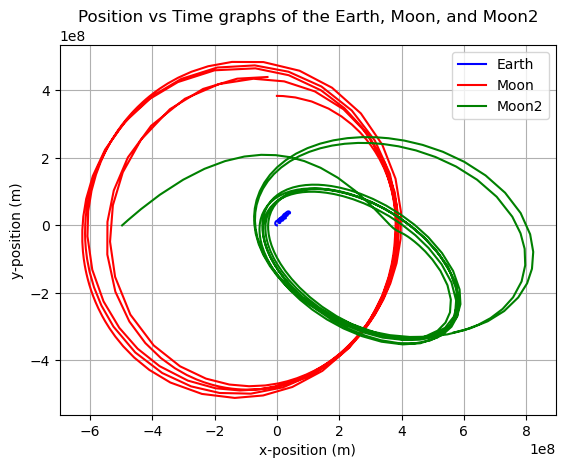

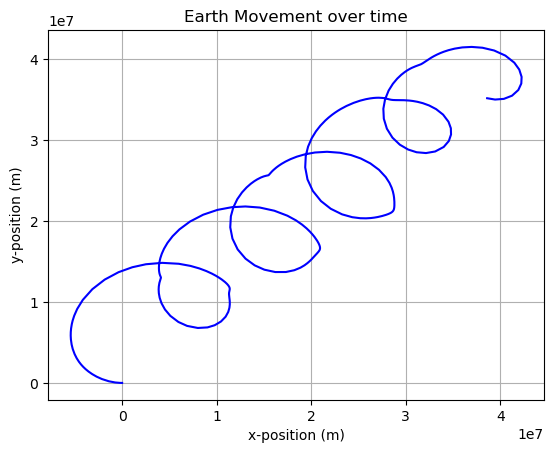

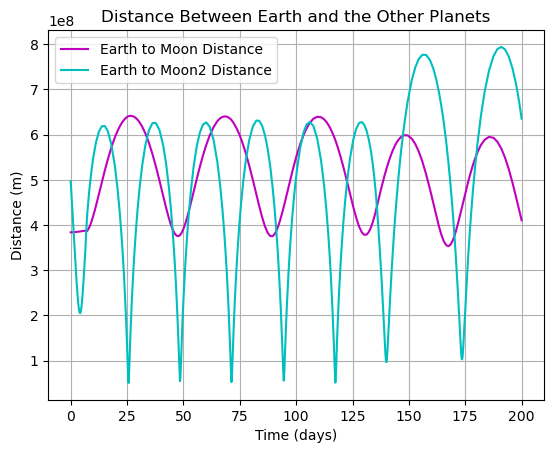

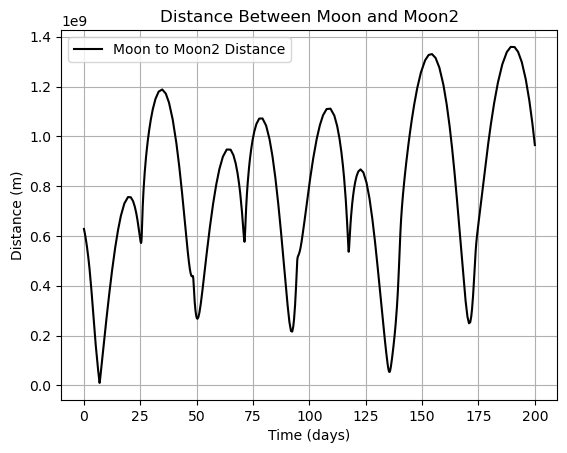

In [8]:
# y vs x graphs for all of the planets
plt.figure(1)
plt.plot(result.y[0], result.y[3], label='Earth', color='b')      # earth y vs x graph
plt.plot(result.y[1], result.y[4], label='Moon', color='r')       # Moon y vs x graph
plt.plot(result.y[2], result.y[5], label='Moon2', color='g')      # Moon2 y vs x graph
plt.xlabel('x-position (m)')
plt.ylabel('y-position (m)')
plt.title('Position vs Time graphs of the Earth, Moon, and Moon2')
plt.legend()
plt.grid(True)
plt.show()

# An expanded view of the movement of the earth over time
plt.figure(2)
plt.plot(result.y[0], result.y[3], color = 'b') # earth y vs graph
plt.xlabel('x-position (m)')
plt.ylabel('y-position (m)')
plt.title('Earth Movement over time')
plt.grid(True)
plt.show()

# Distance between earth and the moon as well as the earth and moon2
plt.figure(3)
earthMoonDist = np.sqrt((result.y[0] - result.y[1])**2 + (result.y[3] - result.y[4])**2) #distance formula on x and y values of each planet
earthMoon2Dist = np.sqrt((result.y[0] - result.y[2])**2 + (result.y[3] - result.y[5])**2)
plt.plot(result.t/(24*3600), earthMoonDist, label='Earth to Moon Distance', color = 'm') # time axis in days
plt.plot(result.t/(24*3600), earthMoon2Dist, label='Earth to Moon2 Distance', color = 'c')
plt.xlabel('Time (days)')
plt.ylabel('Distance (m)')
plt.title('Distance Between Earth and the Other Planets')
plt.legend()
plt.grid(True)
plt.show()

# Distance moon and moon2
plt.figure(4)
moonMoon2Dist = np.sqrt((result.y[1] - result.y[2])**2 + (result.y[4] - result.y[5])**2) #distance formula on x and y values of each planet
plt.plot(result.t/(24*3600), moonMoon2Dist, label='Moon to Moon2 Distance', color = 'k') # time axis in days
plt.xlabel('Time (days)')
plt.ylabel('Distance (m)')
plt.title('Distance Between Moon and Moon2')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(min(earthMoonDist)) #check if there is a collision
print(min(earthMoon2Dist))
print(min(moonMoon2Dist))
if 0 in earthMoonDist:
    print("Collision!")
if 0 in earthMoon2Dist:
    print("Collision!")
if 0 in moonMoon2Dist:
    print("Collision!")

353329115.7350248
50714822.50420327
9938282.16996225
